In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("pga15/admit.csv")

In [5]:
pwd

'D:\\Tamil\\len tamil\\notebook and data\\notebooks'

In [6]:
df

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [7]:
df.isna().sum()

GRE            0
TOEFL          0
Univ_Rating    0
SOP            0
LOR            0
CGPA           0
Research       0
Admit          0
dtype: int64

### data has no missing values

In [8]:
df.dtypes

GRE              int64
TOEFL            int64
Univ_Rating      int64
SOP            float64
LOR            float64
CGPA           float64
Research         int64
Admit            int64
dtype: object

In [9]:
for i in df.columns:
    print("variable -->",i,'\n')
    print(df[i].value_counts())
    print("\n")

variable --> GRE 

312    19
324    19
314    14
316    14
322    14
321    13
325    13
311    12
317    12
327    12
320    12
313    11
326    11
308    11
323    10
315    10
319     9
318     9
300     9
329     9
331     8
340     8
310     8
307     8
305     8
304     8
301     8
299     8
334     7
298     7
328     6
306     6
332     6
330     6
309     6
336     5
296     5
302     5
303     5
295     4
297     4
333     4
335     4
338     4
339     3
294     2
290     2
293     1
337     1
Name: GRE, dtype: int64


variable --> TOEFL 

110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
108    17
109    17
111    17
102    17
103    16
114    15
113    14
101    11
116    11
98      9
115     9
118     9
119     9
120     8
117     7
97      6
96      4
93      2
95      2
94      1
92      1
Name: TOEFL, dtype: int64


variable --> Univ_Rating 

3    133
2    107
4     74
5     60
1     26
Name: Univ_Rating, dtype: int64


variable --> SOP 

3

In [10]:
numeric_data = df.loc[:,['GRE','TOEFL','CGPA']]

In [11]:
numeric_data

,GRE,TOEFL,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21
...,...,...,...
395,324,110,9.04
396,325,107,9.11
397,330,116,9.45
398,312,103,8.78


In [12]:
df.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Admit'],
      dtype='object')

In [13]:
categorical_data = df.loc[:,['Univ_Rating','Research','Admit']]

In [14]:
categorical_data

,Univ_Rating,Research,Admit
0,4,1,1
1,4,1,1
2,3,1,1
3,3,1,1
4,2,0,0
...,...,...,...
395,3,1,1
396,3,1,1
397,4,1,1
398,3,0,0


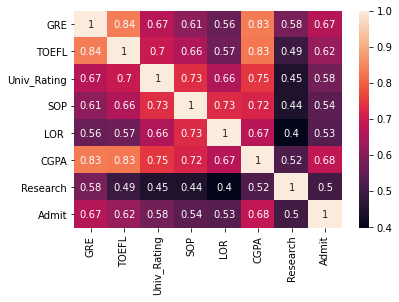

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

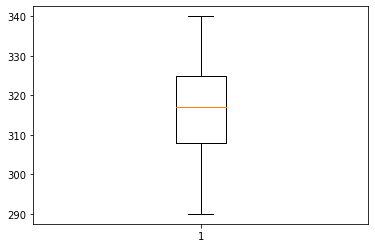

In [16]:
plt.boxplot(df['GRE'])
plt.show()

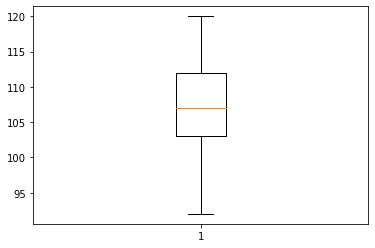

In [17]:
plt.boxplot(df['TOEFL'])
plt.show()

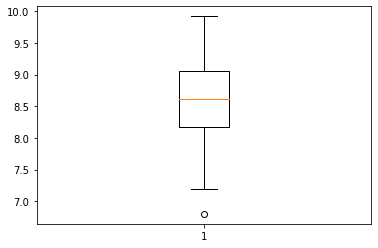

In [18]:
plt.boxplot(df['CGPA'])
plt.show()

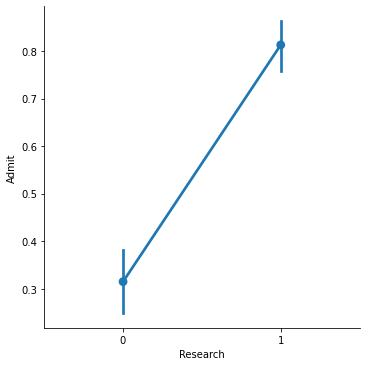

In [19]:
sns.factorplot('Research','Admit',data=df)
plt.show()

In [20]:
#Yes your chance of Admission increases if you do Research.

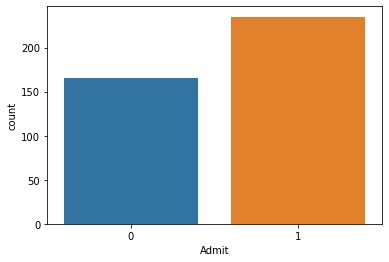

In [21]:
sns.countplot(data=df, x='Admit')
plt.show()

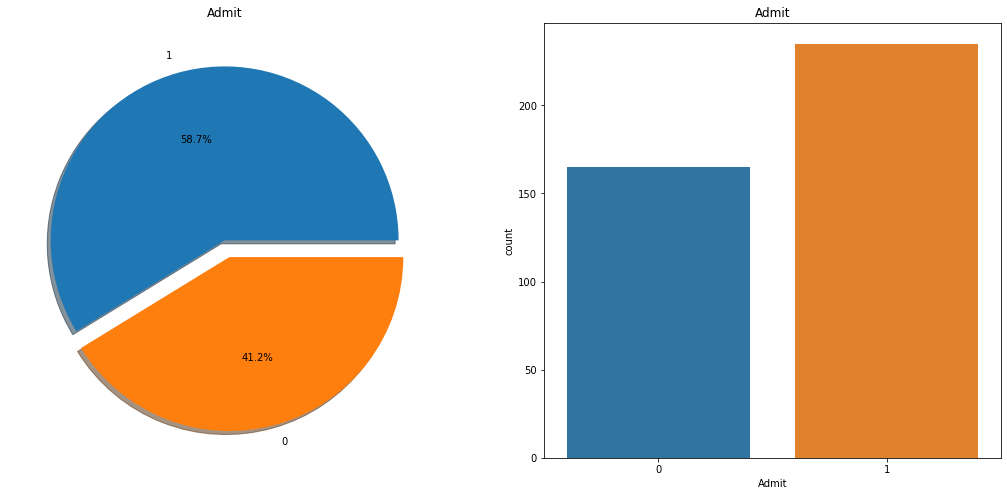

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Admit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Admit')
ax[0].set_ylabel('')
sns.countplot('Admit',data=df,ax=ax[1])
ax[1].set_title('Admit')
plt.show()

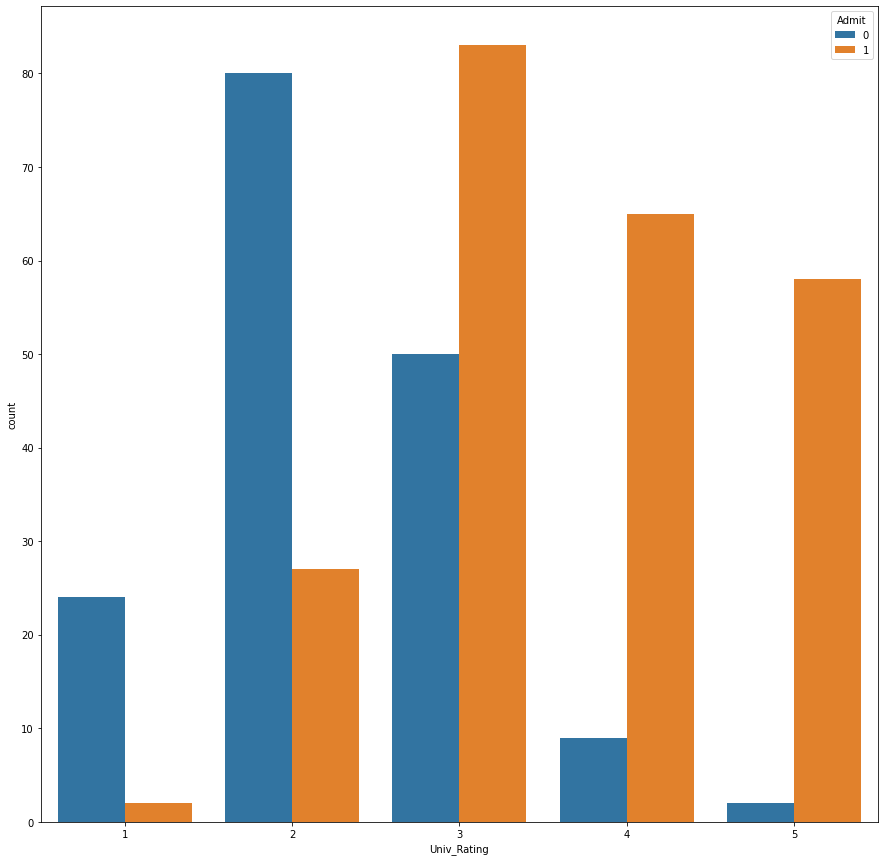

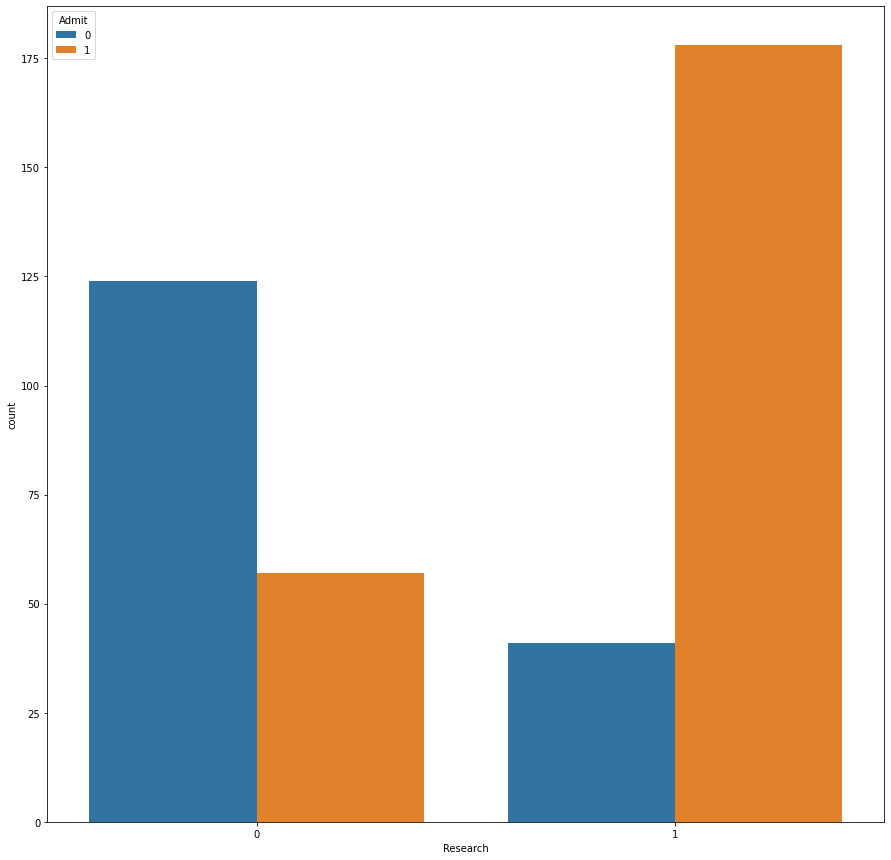

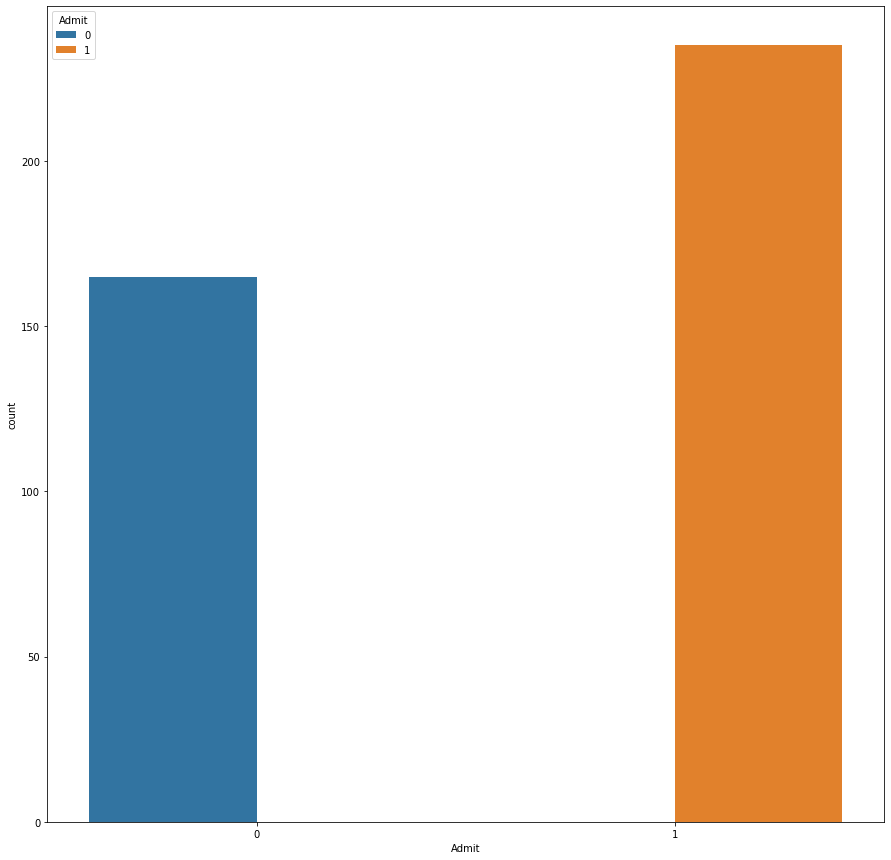

In [23]:
for i in categorical_data.columns:
    plt.figure(figsize=(15,15))
    sns.countplot(categorical_data[i],hue=df['Admit'])

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [59]:
feature_select = SelectFromModel(RandomForestClassifier(n_estimators=50))

In [61]:
feature_select.fit(df.iloc[:,:-1],df.iloc[:,-1])

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50))

In [62]:
feature_select.get_support()

array([ True, False, False, False, False,  True, False])

In [63]:
col_x = df.iloc[:,:-1]

In [64]:
df5 = pd.DataFrame({"Feature_Name": col_x.columns, "Importance": feature_select.get_support()})
df5.sort_values(["Importance"], ascending = False)

,Feature_Name,Importance
0,GRE,True
5,CGPA,True
1,TOEFL,False
2,Univ_Rating,False
3,SOP,False
4,LOR,False
6,Research,False


In [24]:
admit = df.drop(['SOP','LOR ','Research'],axis =1)

In [25]:
admit

,GRE,TOEFL,Univ_Rating,CGPA,Admit
0,337,118,4,9.65,1
1,324,107,4,8.87,1
2,316,104,3,8.00,1
3,322,110,3,8.67,1
4,314,103,2,8.21,0
...,...,...,...,...,...
395,324,110,3,9.04,1
396,325,107,3,9.11,1
397,330,116,4,9.45,1
398,312,103,3,8.78,0


In [26]:
x = admit.iloc[:,:4]

In [27]:
x

,GRE,TOEFL,Univ_Rating,CGPA
0,337,118,4,9.65
1,324,107,4,8.87
2,316,104,3,8.00
3,322,110,3,8.67
4,314,103,2,8.21
...,...,...,...,...
395,324,110,3,9.04
396,325,107,3,9.11
397,330,116,4,9.45
398,312,103,3,8.78


In [28]:
y = admit.iloc[:,-1]

In [29]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Admit, Length: 400, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

In [32]:
x_train

,GRE,TOEFL,Univ_Rating,CGPA
92,298,98,2,8.03
223,308,109,2,8.45
234,330,113,5,9.31
232,312,107,2,8.27
377,290,100,1,7.56
...,...,...,...,...
323,305,102,2,8.18
192,322,114,5,8.94
117,290,104,4,7.46
47,339,119,5,9.70


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
cl = RandomForestClassifier(n_estimators= 1000, criterion= 'entropy',random_state=3,oob_score = True, max_features ='auto')

In [35]:
cl.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True,
                       random_state=3)

In [65]:
cl.feature_importances_

array([0.35228951, 0.18070171, 0.06598582, 0.40102295])

In [36]:
model = RandomForestClassifier(n_estimators= 1000, criterion= 'entropy',random_state=3,oob_score = True, max_features ='auto')

In [37]:
model.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True,
                       random_state=3)

In [38]:
predict = model.predict(x)

In [39]:
predict

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [40]:
pickle.dump(cl,open('modelpk.pkl','wb'))

In [41]:
modelpk = pickle.load(open('modelpk.pkl','rb'))

In [42]:
y_pred = cl.predict(x_test)

In [54]:
train_pred = cl.predict(x_train)

In [43]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import classification_report
print("classification report for test data\n")
print(classification_report(y_train,train_pred))

classification report for test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       164

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [56]:
from sklearn.metrics import classification_report
print("classification report for test data\n")
print(classification_report(y_test,y_pred))

classification report for test data

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.81      0.86      0.84        71

    accuracy                           0.80       120
   macro avg       0.80      0.79      0.79       120
weighted avg       0.80      0.80      0.80       120



In [44]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)

In [45]:
cm

array([[35, 14],
       [10, 61]], dtype=int64)

In [46]:
accuracy=(cm[0,0]+cm[1,1])/cm.sum()*100
print('Accuracy of the model:',accuracy,'%')

Accuracy of the model: 80.0 %


In [47]:
estimator = cl.estimators_[3]

In [48]:
estimator

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1460070019)

In [49]:
from sklearn.tree import export_graphviz
import collections
import graphviz

In [50]:
x.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'CGPA'], dtype='object')

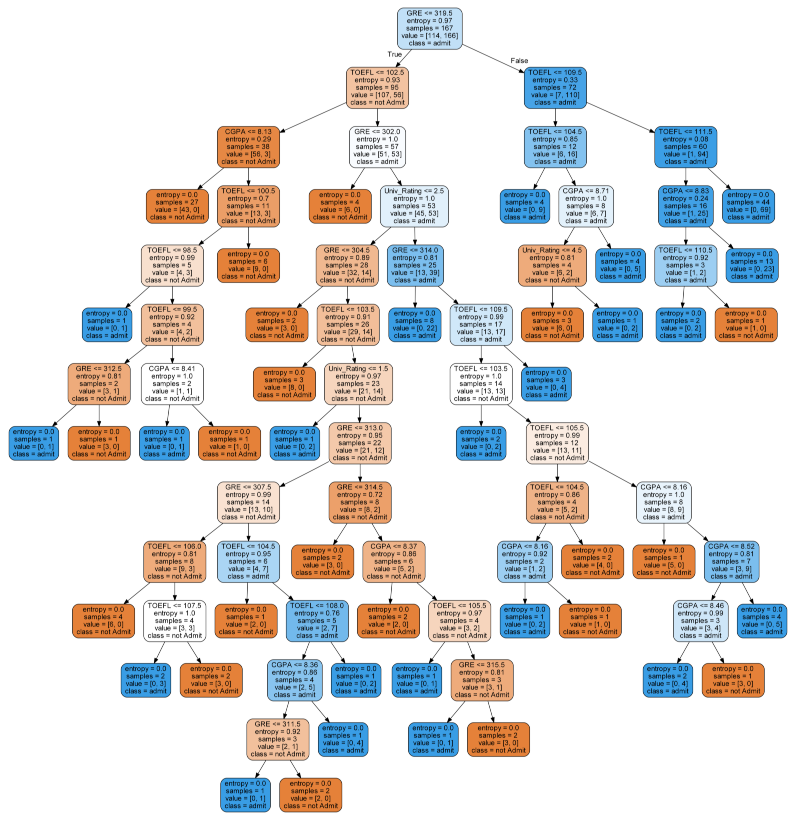

In [51]:
export_graphviz(estimator, out_file='tree6.dot',
                feature_names = ['GRE', 'TOEFL', 'Univ_Rating', 'CGPA'],
                class_names = np.array(['not Admit','admit']),
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree6.dot', '-o', 'tree6.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree6.png'))
plt.axis('off');
plt.show();